# Question 1


In [1]:
import numpy as np
import pandas as pd

indexes = np.array(["Potentially Recoverable Loan(PRL)","Potentially Defaultable Loan(PDL)","NPAs","Recovered Loans(RL)"])

transition_matrix = np.array([[0.7,0.05,0.03,0.22],[0.05,0.55,0.35,0.05],[0,0,1,0],[0,0,0,1]])

df = pd.DataFrame(data=transition_matrix,index=indexes,columns=indexes)
df

,Potentially Recoverable Loan(PRL),Potentially Defaultable Loan(PDL),NPAs,Recovered Loans(RL)
Potentially Recoverable Loan(PRL),0.70,0.05,0.03,0.22
Potentially Defaultable Loan(PDL),0.05,0.55,0.35,0.05
NPAs,0.00,0.00,1.00,0.00
Recovered Loans(RL),0.00,0.00,0.00,1.00


We know P1 + P2 = 1

Lets consider 3 cases<br>
a. P1 = 1 and P2 = 0<br>
b. P1 = 0.5 and P2 = 0.5<br>
c. P1 = 0 and P2 = 1<br>

In [2]:
def run_simul1(initial_prob, transition_matrix, times):
    next_mat = initial_prob.dot(transition_matrix)
    for i in range(0, times):
        next_mat = next_mat.dot(transition_matrix)
#     print(next_mat)
    beautify(initial_prob, next_mat)    
    #verification    
#     print(next_mat.sum())

def beautify(initial, matrix):
    print('\nFor Initial probability of\nPRL-',initial[0],'\nPDL-',initial[1],'\nNPA-',initial[2],'\nRL-',initial[3])
    print('\nAfter Simulation probability of\nPRL-',matrix[0],'\nPDL-',matrix[1],'\nNPA-',matrix[2],'\nRL-',matrix[3])
    print('\n-----------------------------------------------------------\n')
    
    
initial_prob1 = np.array([1,0,0,0])    
initial_prob2 = np.array([0.5,0.5,0,0])    
initial_prob3 = np.array([0,1,0,0])
initial_prob4 = np.array([0.8,0.2,0,0])

run_simul1(initial_prob1, transition_matrix,500000)    
run_simul1(initial_prob2, transition_matrix,500000) 
run_simul1(initial_prob3, transition_matrix,500000)
run_simul1(initial_prob4, transition_matrix,500000) 



For Initial probability of
PRL- 1 
PDL- 0 
NPA- 0 
RL- 0

After Simulation probability of
PRL- 5e-324 
PDL- 5e-324 
NPA- 0.2339622641509434 
RL- 0.7660377358490565

-----------------------------------------------------------


For Initial probability of
PRL- 0.5 
PDL- 0.5 
NPA- 0.0 
RL- 0.0

After Simulation probability of
PRL- 5e-324 
PDL- 5e-324 
NPA- 0.5188679245283017 
RL- 0.4811320754716981

-----------------------------------------------------------


For Initial probability of
PRL- 0 
PDL- 1 
NPA- 0 
RL- 0

After Simulation probability of
PRL- 5e-324 
PDL- 5e-324 
NPA- 0.8037735849056609 
RL- 0.1962264150943396

-----------------------------------------------------------


For Initial probability of
PRL- 0.8 
PDL- 0.2 
NPA- 0.0 
RL- 0.0

After Simulation probability of
PRL- 5e-324 
PDL- 5e-324 
NPA- 0.34792452830188686 
RL- 0.6520754716981134

-----------------------------------------------------------



### Results

For a bank to have good profits, it needs to give out more potentially recoverable loans than Potentially defaultable loans

a) If we start out by giving only Potentially recoverable loans. There is a 0.77 probability that the loan will be recovered.

b) If we start by giving equal number of PRL and PDL loans, there is a 0.51 probability of it getting recovered. 

c) If we start out by giving only Potentially Defaultable loans. There is a 0.19 probability that the loan will be recovered.

---


# Question 2

Let us run simulation for a large number  1000000000
Value gotten using Prime Number Theorem is: 16.179665848612785
1  -  7.037894121934784e-07
2  -  5.982210003644566e-06
3  -  3.389919002065254e-05
4  -  0.0001440715575877733
5  -  0.0004898432957984292
6  -  0.0013878893380955494
7  -  0.0033705883925177634
8  -  0.007162500334100246
9  -  0.013529167297744909
10  -  0.022999584406166347
11  -  0.035544812264075264
12  -  0.050355150707439955
13  -  0.06584904323280609
14  -  0.07995955249697884
15  -  0.09062082616324268
16  -  0.09628462779844535
17  -  0.09628462779844535
18  -  0.09093548180964281
19  -  0.08136332582968041
20  -  0.06915882695522836
21  -  0.05598571705899438
22  -  0.04326169045467748
23  -  0.03197603207519639
24  -  0.022649689386597453
25  -  0.015401788782886266


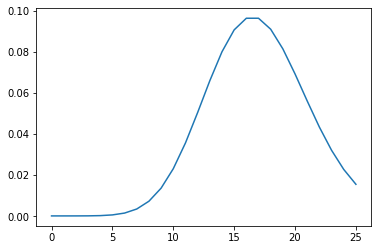

In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt
def no_of_primes(a,b):
    count = 0
    for i in range(a,b+1):
        if i > 1:
            for j in range(2, math.ceil(i/2)):
                if (i % j == 0 ):
                    break
            else:
                count = count+1
    return count                


def prime_no_theorem(a, b):
    result = (b*1.0/math.log(b,math.exp(1))) - (a*1.0/math.log(a,math.exp(1)))
    return result

def poisson_val(x, mean):
    t1 = math.exp(-mean) * (mean ** x)
    t2 = math.factorial(x)
    return t1 / t2


def run_simulation(a, l):
    b = int(a) + (l *(math.log(a)))
    observed = prime_no_theorem(a,b)
    print('Value gotten using Prime Number Theorem is:',observed)
    a = np.array([0])
    for i in range(1,int(observed) + 10):
        val = poisson_val(i,l)
        a = np.append(a,[val])       
        print(i,' - ',val)    
    plt.plot(a)

num = 1000000000
print('Let us run simulation for a large number ',num)    
run_simulation(num, 17)    

primes between 

1 - 100 = 25

1 - 1000 = 169

1 - 10000 = 1229

1 - 100000  = 9593

1 - 1000000 = 78498

1 - 100000000 = 5761455


# Question 3

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('total-deaths-covid-19.csv')
df = df.groupby(['Date']).sum().sort_values('Total confirmed deaths due to COVID-19 (deaths)')
df = df.iloc[31:62,:]
df

,Total confirmed deaths due to COVID-19 (deaths)
Date,
"Jan 31, 2020",852
"Feb 1, 2020",1036
"Feb 2, 2020",1224
"Feb 3, 2020",1452
"Feb 4, 2020",1712
"Feb 5, 2020",1976
"Feb 6, 2020",2264
"Feb 7, 2020",2556
"Feb 8, 2020",2900


In [40]:
#Each day
daily = df.diff().iloc[1:,:]
daily

,Total confirmed deaths due to COVID-19 (deaths)
Date,
"Feb 1, 2020",184.0
"Feb 2, 2020",188.0
"Feb 3, 2020",228.0
"Feb 4, 2020",260.0
"Feb 5, 2020",264.0
"Feb 6, 2020",288.0
"Feb 7, 2020",292.0
"Feb 8, 2020",344.0
"Feb 9, 2020",356.0


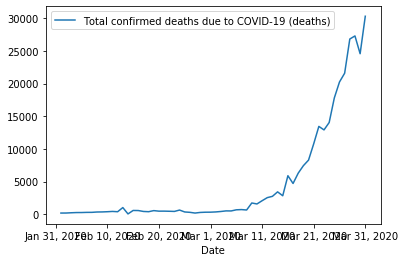

In [29]:
daily.plot()

In [41]:
mean = daily['Total confirmed deaths due to COVID-19 (deaths)'].mean()
mean

381.1